<a href="https://colab.research.google.com/github/tubhardwaj/bhardwaj/blob/master/AML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [57]:
spotify= pd.read_csv("/content/genres_v2.csv")
spotify

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [58]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [59]:
spotify1= spotify.drop(['energy','key','mode','instrumentalness','valence','tempo','type','uri','track_href','analysis_url','duration_ms','time_signature','genre','Unnamed: 0','title'], axis=1)

In [60]:
spotify1

,danceability,loudness,speechiness,acousticness,liveness,id,song_name
0,0.831,-7.364,0.4200,0.059800,0.0556,2Vc6NJ9PW9gD9q343XFRKx,Mercury: Retrograde
1,0.719,-7.230,0.0794,0.401000,0.1180,7pgJBLVz5VmnL7uGHmRj6p,Pathology
2,0.850,-4.783,0.0623,0.013800,0.3720,0vSWgAlfpye0WCGeNmuNhy,Symbiote
3,0.476,-4.710,0.1030,0.023700,0.1140,0VSXnJqQkwuH2ei1nOQ1nu,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,-7.668,0.2930,0.217000,0.1660,4jCeguq9rMTlbMmPHuO7S3,Venom
...,...,...,...,...,...,...,...
42300,0.528,-5.148,0.0304,0.031500,0.1210,46bXU7Sgj7104ZoXxzz9tM,NaN
42301,0.517,-7.922,0.0479,0.022500,0.2050,0he2ViGMUO3ajKTxLOfWVT,NaN
42302,0.361,-3.102,0.0505,0.026000,0.3850,72DAt9Lbpy9EUS29OzQLob,NaN
42303,0.477,-4.777,0.0392,0.000551,0.0575,6HXgExFVuE1c3cq9QjFCcU,NaN


In [61]:
from sklearn import preprocessing

loudness = spotify1[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
spotify1['loudness'] = pd.DataFrame(loudness_scaled)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(spotify1, 
                                                    test_size = 0.3, random_state = 42)

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29613 entries, 5317 to 15795
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  29613 non-null  float64
 1   loudness      29613 non-null  float64
 2   speechiness   29613 non-null  float64
 3   acousticness  29613 non-null  float64
 4   liveness      29613 non-null  float64
 5   id            29613 non-null  object 
 6   song_name     15042 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [64]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12692 entries, 7625 to 20548
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  12692 non-null  float64
 1   loudness      12692 non-null  float64
 2   speechiness   12692 non-null  float64
 3   acousticness  12692 non-null  float64
 4   liveness      12692 non-null  float64
 5   id            12692 non-null  object 
 6   song_name     6477 non-null   object 
dtypes: float64(5), object(2)
memory usage: 793.2+ KB


In [65]:
X_train

,danceability,loudness,speechiness,acousticness,liveness,id,song_name
5317,0.767,0.873442,0.2690,0.039700,0.1820,4RsTfAuTiUyL7GKGPiNC0w,Crunk Ain't Dead
7080,0.857,0.734940,0.1240,0.140000,0.1060,0ui2yU9WtowW3SKO08CWgV,C. V FREESTYLE.
36119,0.657,0.799370,0.1260,0.000407,0.6780,3rAMadwfaIpV3g5ryAzxpu,NaN
20903,0.544,0.737598,0.3930,0.018500,0.4810,7EpACeh5ooHUb0AnQ3f3Xl,Uppercuts
2536,0.709,0.604958,0.0440,0.163000,0.0777,065w89dQkaW7UAyhEy8SZG,Heal
...,...,...,...,...,...,...,...
6265,0.855,0.718340,0.1670,0.200000,0.2530,13sDDPTmAwDvkONEQ8OB3i,Smithy
11284,0.760,0.784304,0.0652,0.057600,0.0514,0PCKaqffqRsFYxKy7uTLti,Soul Doubt
38158,0.464,0.728530,0.0401,0.000151,0.0671,5RCkepCUwImdkbZhIUtglm,NaN
860,0.683,0.778195,0.3590,0.215000,0.1350,72x9Lcah4SMfE5TRf7gira,Seventy Four


In [66]:
X_train_f, X_validation = train_test_split(X_train, 
                                                    test_size = 0.2, random_state = 42)

In [67]:
X_train_f.describe()

,danceability,loudness,speechiness,acousticness,liveness
count,23690.000000,23690.000000,23690.000000,23690.000000,23690.000000
mean,0.639701,0.736269,0.136646,0.097013,0.213811
std,0.156441,0.079940,0.126772,0.172281,0.175782
min,0.065100,0.000000,0.022700,0.000001,0.010700
25%,0.524000,0.690077,0.049000,0.001730,0.099500
50%,0.647000,0.742556,0.075300,0.016800,0.135000
75%,0.767000,0.789344,0.193000,0.108000,0.292000
max,0.988000,0.982222,0.944000,0.986000,0.988000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8565b0e710>,
      dtype=object)

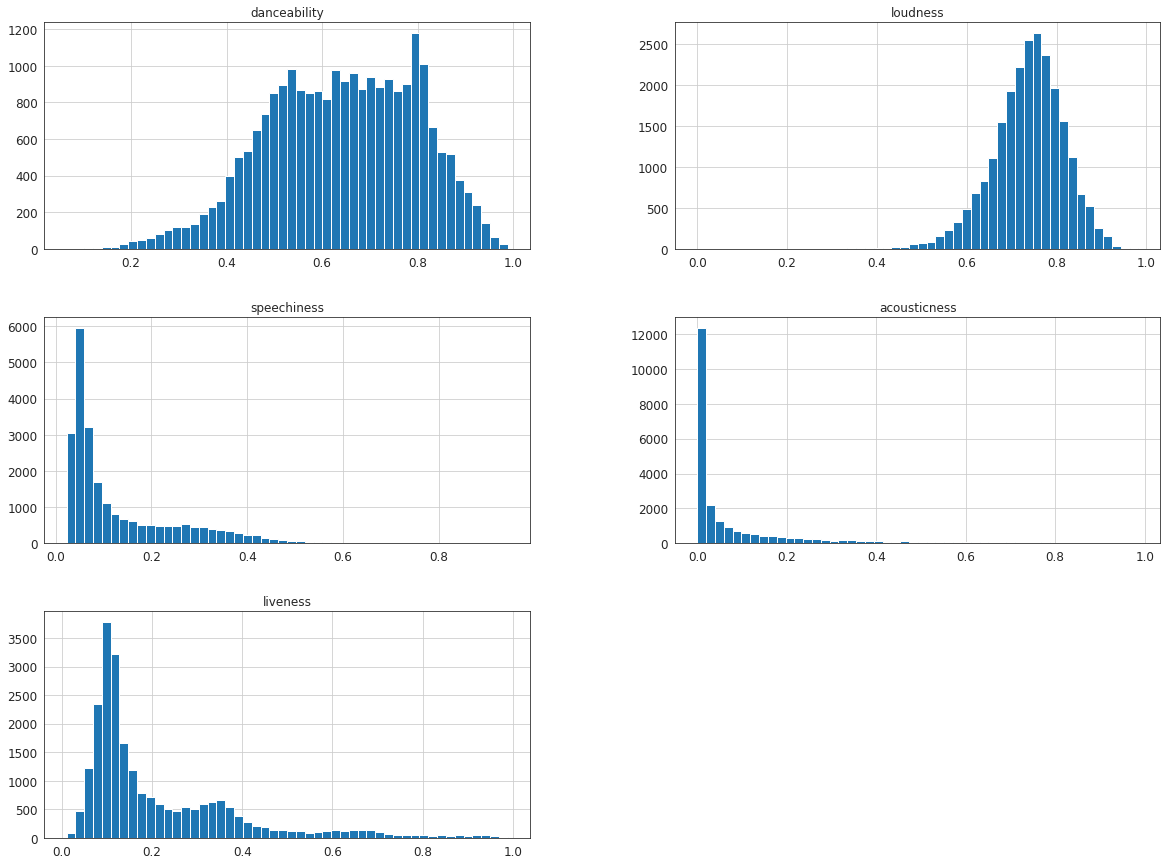

In [68]:
X_train_f.hist(bins=50,figsize=(20,15))

In [69]:
songs_features = X_train_f.copy()
songs_features = songs_features.drop(['song_name','id'],axis=1)
songs_features

,danceability,loudness,speechiness,acousticness,liveness
16720,0.697,0.676784,0.0534,0.62000,0.1070
14333,0.748,0.757074,0.1940,0.25700,0.1300
9416,0.757,0.670127,0.4140,0.29100,0.5820
8459,0.595,0.682920,0.0385,0.16500,0.0959
19614,0.797,0.646952,0.0412,0.01720,0.1030
...,...,...,...,...,...
19733,0.886,0.639063,0.1450,0.03120,0.0906
16477,0.817,0.737735,0.0650,0.23500,0.3890
39725,0.511,0.808930,0.0340,0.02190,0.1320
18975,0.503,0.741296,0.0657,0.00757,0.0803


In [70]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

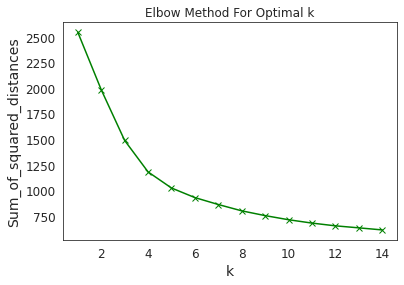

In [71]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [72]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.271570555850589)
For n_clusters = 3, silhouette score is 0.320167225649246)
For n_clusters = 4, silhouette score is 0.27685816919177236)
For n_clusters = 5, silhouette score is 0.2742301380210629)
For n_clusters = 6, silhouette score is 0.2617538029162228)
For n_clusters = 7, silhouette score is 0.26035791734538116)
For n_clusters = 8, silhouette score is 0.26110609877430174)
For n_clusters = 9, silhouette score is 0.2581221727216705)
For n_clusters = 10, silhouette score is 0.22477272214372215)
For n_clusters = 11, silhouette score is 0.22952591697165)
For n_clusters = 12, silhouette score is 0.2324312948469181)
For n_clusters = 13, silhouette score is 0.22964073445281183)
For n_clusters = 14, silhouette score is 0.212130776122523)


In [73]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)

KMeans(n_clusters=4)

In [77]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


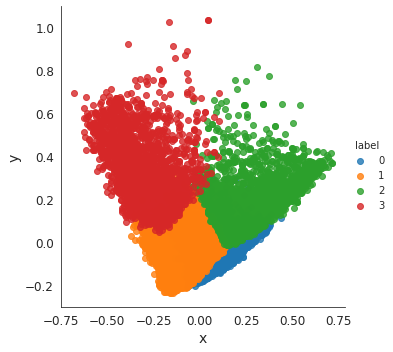

In [78]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [79]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: ignored

In [80]:
X_train_f['label'] = y_kmeans

# shuffle dataset

songs = X_train_f.sample(frac=1)
songs['label'].value_counts()

1    9723
0    8469
2    3154
3    2344
Name: label, dtype: int64

In [81]:
songs[songs['label'] == 0].tail(50)

,danceability,loudness,speechiness,acousticness,liveness,id,song_name,label
13176,0.325,0.758252,0.1660,0.013200,0.1250,206qxxvb6LcAFzoIGu6ThG,Came Out Swinging,0
40006,0.564,0.834708,0.0482,0.023600,0.1650,7uGBB2kOMToO0KArfaWn7e,NaN,0
41738,0.536,0.644734,0.0375,0.030900,0.3870,2tduRVV6TADxw01VlLRcx9,NaN,0
29734,0.454,0.783728,0.0635,0.001170,0.2960,61M91J8cKN4v2wu8iNX3hN,NaN,0
34835,0.537,0.835885,0.0500,0.000104,0.2370,0PTUV1Hy9OkWKiXzDsq2RD,NaN,0
40277,0.489,0.779564,0.0778,0.000899,0.3310,5yKO05UAPrEajb3opZg8pl,NaN,0
37555,0.568,0.874182,0.2530,0.013200,0.2210,6x3rkMbvsR21hh9GhKE6s5,NaN,0
32452,0.518,0.730557,0.0580,0.006140,0.0719,74BaIbQREvf5xeEGZu1h8B,NaN,0
7213,0.644,0.697987,0.0688,0.003290,0.1460,3uvKXKQxcmjPT7letWh3Pf,2:45,0
18244,0.590,0.703164,0.0513,0.021300,0.0809,1caTqvWIUlkpY122g17GIm,Back Around,0


In [82]:
songs[songs['label']==1].head(15)

,danceability,loudness,speechiness,acousticness,liveness,id,song_name,label
39066,0.670,0.793069,0.0582,0.000766,0.0960,3DIkJHM91QSXhQGK4tPixG,NaN,1
34545,0.633,0.788056,0.2450,0.156000,0.1080,1MfNEronVPSizggqft11k2,NaN,1
9995,0.695,0.814108,0.0912,0.189000,0.0998,54PAzPFEIkL6iJ60KGRwRF,Stack That Dough,1
22300,0.719,0.819285,0.0590,0.004160,0.0695,1lJhD9oR0334xN5FMMPrSA,NaN,1
31254,0.625,0.549925,0.0329,0.121000,0.1020,2ITmZgTEEXsBnzCPJ40JHp,NaN,1
4941,0.811,0.562909,0.1280,0.003020,0.0599,1qkwR7k0OSjRJ7Nqk5e7Mi,WET EM UP,1
26950,0.677,0.677359,0.0470,0.000643,0.2760,2W5RO6di2R41UcyQwjaNnG,NaN,1
7952,0.912,0.723928,0.4230,0.074700,0.1040,7cKV2HQRSAVGwF4xzcbfrg,A MESSAGE TO MY OPPS,1
359,0.713,0.661088,0.0356,0.055800,0.1290,5CAbUWctamBus37mAxVWp0,Trust Me,1
5721,0.854,0.690481,0.1060,0.060900,0.1000,7ycWLEP1GsNjVvcjawXz3z,Praise The Lord (Da Shine) (feat. Skepta),1


In [83]:
songs[songs['label']==2].head(30)


,danceability,loudness,speechiness,acousticness,liveness,id,song_name,label
9726,0.774,0.729215,0.2300,0.162000,0.607,1Xfs5Nh48DNL5RJs8tkyzv,Simonal,2
11956,0.539,0.716915,0.0443,0.008180,0.882,7yedrY47N8BnumOPH0KFR3,Blaclines,2
34471,0.630,0.892179,0.1140,0.006670,0.395,11mmKrpPPEpLU79bqmDr0n,NaN,2
36995,0.544,0.843857,0.0464,0.035500,0.631,5cRDn5aGMLvWsldoRmOOz0,NaN,2
22438,0.683,0.729188,0.0393,0.000304,0.404,479zr8nsc2kEOPRQipFuPo,NaN,2
27594,0.570,0.712231,0.0365,0.000159,0.429,4JZ4TfuizgHOPlLn5ByCij,NaN,2
7450,0.864,0.814382,0.1210,0.022100,0.734,7gkTXJ8ZyNr0NNaZmVWUhw,Pump Fake,2
34483,0.613,0.867689,0.2310,0.002760,0.931,6BL7QbMukjODVnun1XPoeJ,NaN,2
21088,0.580,0.672757,0.2840,0.009350,0.356,48YDXAc4Ffe2FTGvFXHi1Y,Bounce To This,2
28443,0.518,0.680099,0.0460,0.002810,0.580,5ZVKSSkG7xDuQ5xOAvXPlp,NaN,2
